In [87]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import collections

In [88]:
taxiData = open('TaxiWeatherStation_demo.csv','r')
#taxiData.head()
#taxiData = taxiData.drop(taxiData.columns[[0,1,2,3,4,5,10,11,12,13,14,15,16,17,18]],axis=1)
#taxiData.head()

In [89]:
xData = []
bucket = 1

numberOfTrips = collections.defaultdict(int)
for i in range(100):
    numberOfTrips[i] = 0

taxiData.readline()

for line in taxiData.readlines():
    line = line.split(',')
    if int(line[9]) != 1:
        continue
    if float(line[8]) != 0.0:
        if float(line[8])-float(line[7]) == 0.0:
            numberOfTrips[100/bucket] += 1
        else:
            tipPerc = (float(line[7])/(float(line[8])-float(line[7])))
            tipPerc = tipPerc/bucket
            tipPerc = int(round(tipPerc * 100))
            
            if tipPerc > (100/bucket):
                continue
            numberOfTrips[tipPerc] += 1

            #print tipPerc
            
for i in range(100):
    numberOfTrips[i] = int(numberOfTrips[i]**0.5)
            
#numberOfTrips[0] = 1000
    
print numberOfTrips
    

defaultdict(<type 'int'>, {0: 45, 1: 3, 2: 3, 3: 6, 4: 10, 5: 11, 6: 13, 7: 14, 8: 17, 9: 18, 10: 21, 11: 22, 12: 18, 13: 23, 14: 19, 15: 19, 16: 15, 17: 17, 18: 14, 19: 13, 20: 89, 21: 9, 22: 7, 23: 6, 24: 6, 25: 46, 26: 3, 27: 5, 28: 1, 29: 5, 30: 29, 31: 3, 32: 3, 33: 5, 34: 2, 35: 4, 36: 3, 37: 2, 38: 4, 39: 2, 40: 3, 41: 2, 42: 2, 43: 4, 44: 2, 45: 2, 46: 1, 47: 1, 48: 1, 49: 0, 50: 2, 51: 0, 52: 2, 53: 2, 54: 1, 55: 1, 56: 1, 57: 1, 58: 0, 59: 1, 60: 1, 61: 1, 62: 0, 63: 1, 64: 1, 65: 0, 66: 0, 67: 2, 68: 1, 69: 0, 70: 0, 71: 1, 72: 0, 73: 0, 74: 0, 75: 0, 76: 1, 77: 0, 78: 0, 79: 0, 80: 1, 81: 0, 82: 1, 83: 1, 84: 0, 85: 0, 86: 1, 87: 0, 88: 1, 89: 0, 90: 0, 91: 0, 92: 1, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 9})


defaultdict(<type 'int'>, {0: 45, 1: 3, 2: 3, 3: 6, 4: 10, 5: 11, 6: 13, 7: 14, 8: 17, 9: 18, 10: 21, 11: 22, 12: 18, 13: 23, 14: 19, 15: 19, 16: 15, 17: 17, 18: 14, 19: 13, 20: 89, 21: 9, 22: 7, 23: 6, 24: 6, 25: 46, 26: 3, 27: 5, 28: 1, 29: 5, 30: 29, 31: 3, 32: 3, 33: 5, 34: 2, 35: 4, 36: 3, 37: 2, 38: 4, 39: 2, 40: 3, 41: 2, 42: 2, 43: 4, 44: 2, 45: 2, 46: 1, 47: 1, 48: 1, 49: 0, 50: 2, 51: 0, 52: 2, 53: 2, 54: 1, 55: 1, 56: 1, 57: 1, 58: 0, 59: 1, 60: 1, 61: 1, 62: 0, 63: 1, 64: 1, 65: 0, 66: 0, 67: 2, 68: 1, 69: 0, 70: 0, 71: 1, 72: 0, 73: 0, 74: 0, 75: 0, 76: 1, 77: 0, 78: 0, 79: 0, 80: 1, 81: 0, 82: 1, 83: 1, 84: 0, 85: 0, 86: 1, 87: 0, 88: 1, 89: 0, 90: 0, 91: 0, 92: 1, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 9})
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,

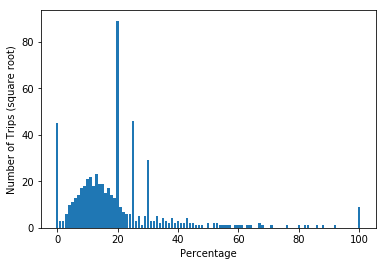

In [91]:
print numberOfTrips
#plt.plot(numberOfTrips.values(), label = "Tip percentage")
#plt.xticks(numberOfTrips.keys(), rotation='vertical')
keys = numberOfTrips.keys()
print keys
#plt.hist(numberOfTrips.values())
plt.bar(range(len(numberOfTrips.keys())), list(numberOfTrips.values()), align='center')

plt.ylabel('Number of Trips (square root)')
plt.xlabel('Percentage')
plt.legend()
plt.show()
plt.savefig('Weather.png')